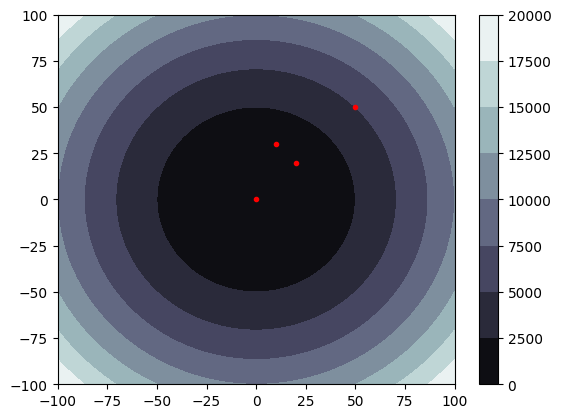

In [2]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
import numpy as np

def sphere_function_formula(x: np.array) -> float:
    return np.sum(np.square(x))

sphere_function = {
    'name' : 'sphere',
    'formula': sphere_function_formula,
    'search_domain': [[-10 ** 2, 10 ** 2] for _ in range(2)],
    'search_and_velocity_boundaries': [[-100, 100], [-0.2 * 100, 0.2 * 100]],
    'goal_point': np.zeros(2)
}

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

min_x, max_x = sphere_function['search_domain'][0][0], sphere_function['search_domain'][0][1]
min_y, max_y = sphere_function['search_domain'][1][0], sphere_function['search_domain'][0][1]
grid_partitions = 100

x_linspace = np.linspace(min_x, max_x, grid_partitions)
y_linspace = np.linspace(min_y, max_y, grid_partitions)

x_axis, y_axis = np.meshgrid(x_linspace, y_linspace)
contour_grid_points = np.stack( (x_axis, y_axis), 0 ).T
contour_levels = np.apply_along_axis(sphere_function_formula, axis=2, arr=contour_grid_points)

cs = plt.contourf(x_axis, y_axis, contour_levels,
                  cmap ="bone")
  
cbar = plt.colorbar(cs)

test_points_x = [50, 20, 10, 0]; test_points_y = [50, 20, 30, 0]
plt.plot(test_points_x, test_points_y, 'r.')

# How to automatically change between different colours, instead of providing them to each different plot
# (look at second and third answer).
# https://stackoverflow.com/questions/13091649/unique-plot-marker-for-each-plot-in-matplotlib

# Very good, interactive and with animation capabilities libray! Plotnine (based on ggplot2)

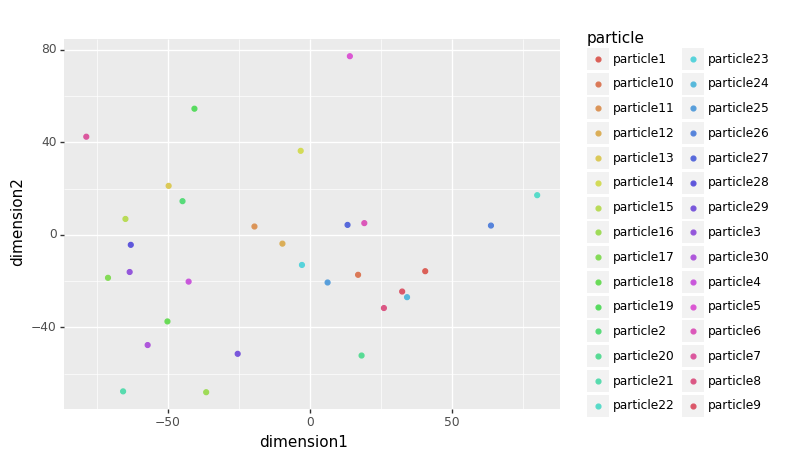

<ggplot: (117393977977)>

In [247]:
import pandas as pd
from plotnine import ggplot, aes, facet_grid, geom_point

df_data = pd.read_csv(f'./../../sphere_function_eis_aclan_pso_c3_linear_2.0_c3k_constant_1.0_6x5_raw_data.csv',
                      header=[0,1,2], index_col=0)

df_data
df_data = df_data.stack([0,1])
df_data.reset_index(('clan', 'particle'), inplace=True)
df_data
#df_data.iloc[0]
#df_data[df_data['particle']=='particle1']
#df_data.reset_index(level=[1,2], inplace=True)
#df_data.columns
#df_data.columns
#df_data.stack([0, 1]).loc['iteration1']

#df_data[df_data['particle']=='particle1']
ggplot(df_data.loc['iteration1']) + aes(x='dimension1', y='dimension2', color='particle') + geom_point()